In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
import random

In [2]:
def flipCoin():
    return random.choice([True,False])

    

it is true
it is true
it is false
it is false
it is false
it is true
it is false
it is true


In [3]:
#initialization

N = 5000
sKapital = 100000
agents = 2


# counter for wins in individual trades
win0 = 0
win1 = 0
#counter for overall win
final0 = 0
final1 = 0


# Setting up the matrix that holds the values
people = np.zeros((N,agents))
people[:] = np.NaN

# Filling it with the start values which our agents will trade with
people[0,:] = np.array([sKapital,sKapital])
systemwealth = np.sum(people[0,:])


In [4]:
# The first trade system

for i in range(N-1): #Dette er selve traden
    """
    Her sjekker vi om noen har vunnet, dersom en person vinner så legger vi til 1 på antall ganger vunnet,
    hvor mange ganger de har vunnet printes helt til slutt, vi antar at antall wins for begge to skal være relativt lik.

    """
    if people[i,0] >= 0.90*systemwealth:
        #print("breaktime 1")
        final0 +=1
        k = i
        break
    elif people[i,1] >= 0.90*systemwealth:
        #print("breaktime 2")
        final1 += 1
        k = i
        break


    #checking who has more wealth, the agent with least wealth becomes the basis for calculating loss or win.
    if people[i,0] < people[i,1]:
        w = people[i,0] # amount gambeled determined by the wealth of the poorest 
        normal = 0
        rich = 1
    elif people[i,0] > people[i,1]:
        w = people[i,1] 
        normal = 1
        rich = 0
    else: #equal wealth
        w = people[i,1]
        rich = 2
        normal = 1

    firstwins = flipCoin() # Returns who wins

    #normal wins
    if rich != 2 and (firstwins == True):
        people[i+1,normal] = people[i,normal] + 0.2 * w #loser
        people[i+1,rich] = people[i,rich] - 0.2 * w #winner



        #normal loses
    elif rich != 2 and (firstwins== False): 
        people[i+1,normal] = people[i,normal] - 0.17 * w #loser
        people[i+1,rich] = people[i,rich] + 0.17 * w #winner

        #they are equal, so no-one is rich or poor, but someone has to win.
    elif rich == 2 and (firstwins == True):
        people[i+1,0] = people[i,0] - 0.2 * w 
        people[i+1,1] = people[i,1] + 0.2 * w 

    elif rich == 2 and (firstwins == False):
        people[i+1,1] = people[i,1] - 0.2 * w 
        people[i+1,0] = people[i,0] + 0.2 * w 



    

This is how many times the different agents have won the tradingbattle 1,0


Text(0.5, 0, 'Iterations')

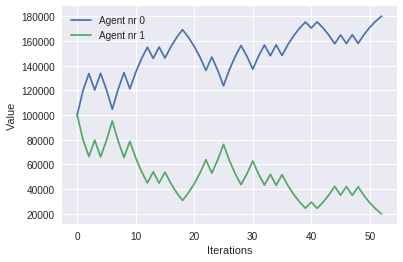

In [5]:
#plotter selve resultatet
plt.plot(people[:,0],label = "Agent nr 0")

plt.plot(people[:,1], label = "Agent nr 1")
plt.legend()
print(f"This is how many times the different agents have won the tradingbattle {final0},{final1}")
plt.ylabel("Value")
plt.xlabel("Iterations")

In [6]:
def elector(listvar):
    """
    Takes a list of numbers or agents, returnes two different agents who will then trade 
    """
    # First we copy the index list so we dont modify it
    newlist = list.copy(listvar)
    
    # Then we have to pick a random index and remove it from the list
    agent1 = random.choice(newlist)
    newlist.remove(agent1)
    
    # Repeat, however now removing it is unnecessary
    agent2 = random.choice(newlist)
    return [agent1, agent2]




In [7]:
def traderfunc(people):    
    peoplenew = [0,0]



        #checking who has more wealth, he is winner
    if people[0] < people[1]:
        w = people[0] #amount gambeled determined by the wealth of the poorest 
        normal = 0
        rich = 1
    elif people[0] > people[1]:
        w = people[1] 
        normal = 1
        rich = 0
    else: #equal wealth
        w = people[1]
        rich = 2
        normal = 1

    firstwins = flipCoin()

    #Normal wins
    if rich != 2 and (firstwins == True):
        peoplenew[normal] = people[normal] + 0.2 * w #loser
        peoplenew[rich] = people[rich] - 0.2 * w #winner



        #Normal loses
    elif rich != 2 and (firstwins== False): 
        peoplenew[normal] = people[normal] - 0.17 * w #loser
        peoplenew[rich] = people[rich] + 0.17 * w #winner

        # they are equal and number 1 wins
    elif rich == 2 and (firstwins == True):
        peoplenew[0] = people[0] - 0.2 * w 
        peoplenew[1] = people[1] + 0.2 * w 
        
        #they are equal and number 0 wins
    elif rich == 2 and (firstwins == False):
        peoplenew[1] = people[1] - 0.2 * w 
        peoplenew[0] = people[0] + 0.2 * w 
            
            
    return peoplenew


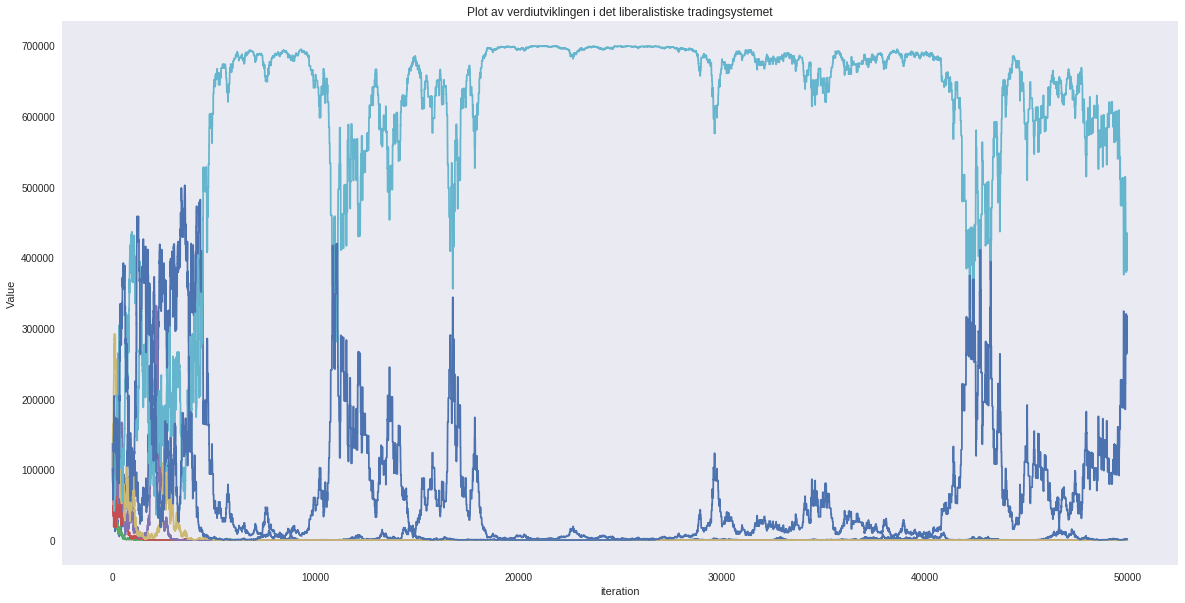

In [8]:
sKapital = 100000 # start kapital
N = 50000 # number of iterations for the trading period
ant_agents = 7 # Number of agents present in our system

matrix = np.zeros((N,ant_agents)) # Making the agent matrix of dimention (N,number of agents)

# a for loop designed to fill inn the initial conditions
for i in range(ant_agents): 
    matrix[0,i] = sKapital
    
# Furthermore we create a list of the indexes to the corresponding agents
indexagents = [i for i in range(ant_agents)] 

counter = np.zeros(ant_agents) # This is designed to count how many times the different agents won



# The trade loop
for i in range(N-1):
    #Making sure that the previous value for the agents who dont trade is not lost
    matrix[i+1,:] = matrix[i,:] 

    #Electing two different agents to trade, then giving them their new value
    e1,e2 = elector(indexagents)
    newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]])
    matrix[i+1,e1] = newval1
    matrix[i+1,e2] = newval2

    #Filling the counter with who won
    counter[e1] +=1
    counter[e2] +=1
   
    

#Ploting the results

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
plt.ylabel("Value")
plt.xlabel("iteration")
plt.title("Plot av verdiutviklingen i det liberalistiske tradingsystemet")

for i in range(ant_agents):
    ax.plot(matrix[:,i])

### Defining the GINI and lorenz function

In [ ]:


matrix2 = np.array(np.sort([matrix[-1,:]]))

def gini(matrix):
    count = matrix.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * matrix).sum()
    total = matrix.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(matrix):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = matrix.cumsum() / matrix.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

#print(f"GINI koeffisienten er {gini(matrix2)}")

lorenz_curve = lorenz(matrix2)

fig,ax = plt.subplots(figsize = (8,6))
ax.axis('equal')

ax.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve,label = "Lorenz curve")
ax.plot([0,1], [0,1], label = "Complete egalitarianism")
plt.title(f"The lorenz curve with a GINI coefficient of {gini(matrix2):.2f}")
ax.legend()


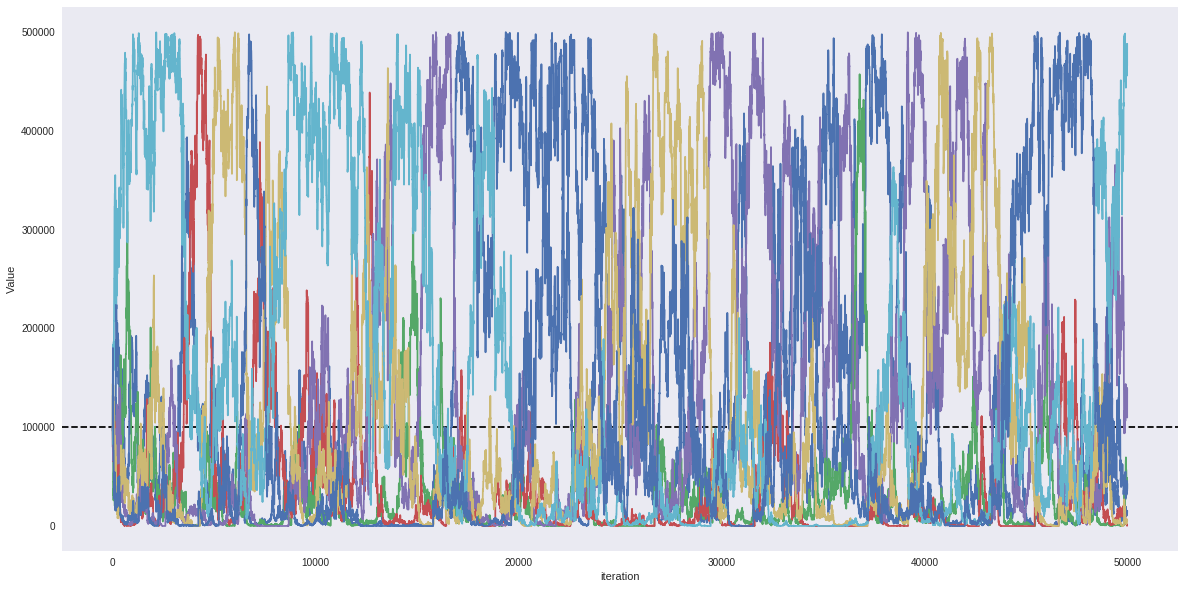

In [12]:
ant_agents = 7 # number of agents
sKapital = 100000 #start capital
wmed = sKapital


# Lim is the wealthlimit and percent is the percent of wealth redistributed
lim = 5
percent = 0.05

#Making the matrix
matrix = np.zeros((N,ant_agents))


#Filling it with the inital values
for i in range(ant_agents):
    matrix[0,i] = sKapital #giving all agents start capital
indexagents = [i for i in range(ant_agents)] #indexing each agent


overlim = []
over = 0
underlim = []
under = 0
atlim = []
at = 0





    

# Here we trade in a for loop with a function
for i in range(N-1):
    matrix[i+1,:] = matrix[i,:]


    over, under,at = 0,0,0
    for k in matrix[i+1,:]:
        if k > wmed:
            over += 1
        elif k < wmed: 
            under +=1
        elif k == wmed:
            at += 1
    overlim.append(over)
    underlim.append(under)
    atlim.append(at)

    e1,e2 = elector(indexagents) #choosing two agents to conduct a trade
    newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]]) #calculating new wealth
    matrix[i+1,e1] = newval1 #updating wealth for chosen angents
    matrix[i+1,e2] = newval2

    for elem in [e1,e2]: # loops over the two elements
        if matrix[i+1,elem] >= lim* wmed: # If one of them is above 5 times the median then proceed
            poorindex = np.argmin(matrix[i+1,:]) # Finding the index of the poorest agent
            matrix[i+1,poorindex] += percent*matrix[i+1,elem] # Giving som of the wealth to the poor agent
            matrix[i+1,elem] -= percent*matrix[i+1,elem] # Removing said wealth 


fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
plt.ylabel("Value")
plt.xlabel("iteration")



plt.axhline(y = sKapital,color ="black", linestyle = "--")
for i in range(ant_agents):
    ax.plot(matrix[:,i])

GINI koeffisienten er 0.4860912523368275


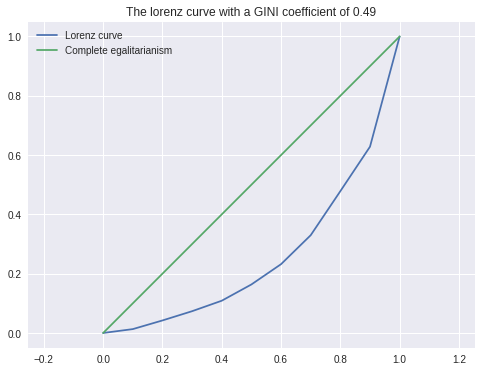

In [11]:
last_iteration = np.array(np.sort([matrix[-1,:]]))
lorenz_curve = lorenz(last_iteration)
#print(f"GINI koeffisienten er {gini(last_iteration)}")


fig,ax = plt.subplots(figsize = (8,6))
ax.axis('equal')

ax.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve,label = "Lorenz curve")
# plot the straight line perfect equality curve
ax.plot([0,1], [0,1], label = "Complete egalitarianism")
plt.title(f"The lorenz curve with a GINI coefficient of {gini(last_iteration):.2f}")
ax.legend()